In [1]:
"""
Run Bethe-lattice hybridisation fit and compare to analytic Green function.
"""

from andersoned import fit_bethe_bath, bethe_green
import numpy as np
import matplotlib.pyplot as plt

Fit finished — χ² = 4.360e-05
ε_p  = [-0.4387 -0.0695  0.0695  0.4387]
|V_p| = [0.2963 0.17   0.17   0.2963]


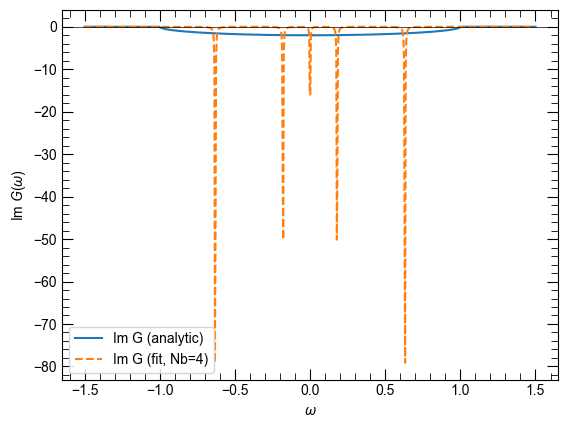

In [ ]:
nbath = 4
beta = 50.0
nw_fit = 200
W = 1.0
eps_p, V_p, chi2 = fit_bethe_bath(nbath, beta, nw_fit)
print(f"Fit finished — χ² = {chi2:.3e}")
print("ε_p  =", np.round(eps_p, 4))
print("|V_p| =", np.round(V_p, 4))

omega = np.linspace(-1.5 * W, 1.5 * W, 800)
delta = 1e-3

G_true = bethe_green(omega + 1j * delta, W)
Delta_fit = (V_p[:, None] ** 2 / (omega[None, :] + 1j * delta - eps_p[:, None])).sum(
    axis=0
)
G_fit = 1.0 / (omega + 1j * delta - Delta_fit)

fig, ax = plt.subplots()
ax.plot(omega, G_true.imag, label="Im G (analytic)")
ax.plot(omega, G_fit.imag, "--", label=f"Im G (fit, Nb={len(eps_p)})")
ax.set_xlabel(r"$\omega$")
ax.set_ylabel(r"Im $G(\omega)$")
ax.axhline(0, color="k", lw=0.5)
ax.legend()
plt.show()